<a href="https://colab.research.google.com/github/PeriAdan/Books-Price-Graph/blob/main/Graphing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [98]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
df = pd.read_csv("/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/prc_hicp_midx_1_Data.csv")

In [100]:
df

,TIME,COICOP,COICOP_LABEL,UNIT,UNIT_LABEL,GEO,GEO_LABEL,Value,Flag and Footnotes
0,2009M01,CP00,All-items HICP,I15,"Index, 2015=100",EU27_2020,European Union - 27 countries (from 2020),90.32,NaN
1,2009M01,CP095,"Newspapers, books and stationery",I15,"Index, 2015=100",EU27_2020,European Union - 27 countries (from 2020),86.71,NaN
2,2009M01,CP0951,Books,I15,"Index, 2015=100",EU27_2020,European Union - 27 countries (from 2020),93.38,NaN
3,2009M01,CP09511,Fiction books,I15,"Index, 2015=100",EU27_2020,European Union - 27 countries (from 2020),:,NaN
4,2009M01,CP09512,Educational text books,I15,"Index, 2015=100",EU27_2020,European Union - 27 countries (from 2020),:,NaN
...,...,...,...,...,...,...,...,...,...
1179,2021M04,CP09511,Fiction books,I15,"Index, 2015=100",EU27_2020,European Union - 27 countries (from 2020),:,NaN
1180,2021M04,CP09512,Educational text books,I15,"Index, 2015=100",EU27_2020,European Union - 27 countries (from 2020),:,NaN
1181,2021M04,CP09513,Other non-fiction books,I15,"Index, 2015=100",EU27_2020,European Union - 27 countries (from 2020),:,NaN
1182,2021M04,CP09514,Binding services and E-book downloads,I15,"Index, 2015=100",EU27_2020,European Union - 27 countries (from 2020),:,NaN


In [101]:
df.value_counts()

Series([], dtype: int64)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TIME                1184 non-null   object 
 1   COICOP              1184 non-null   object 
 2   COICOP_LABEL        1184 non-null   object 
 3   UNIT                1184 non-null   object 
 4   UNIT_LABEL          1184 non-null   object 
 5   GEO                 1184 non-null   object 
 6   GEO_LABEL           1184 non-null   object 
 7   Value               1184 non-null   object 
 8   Flag and Footnotes  0 non-null      float64
dtypes: float64(1), object(8)
memory usage: 83.4+ KB


In [103]:
df['Flag and Footnotes'].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
1179    True
1180    True
1181    True
1182    True
1183    True
Name: Flag and Footnotes, Length: 1184, dtype: bool

In [104]:
df = df.drop(columns =['Flag and Footnotes'])
df.head()

,TIME,COICOP,COICOP_LABEL,UNIT,UNIT_LABEL,GEO,GEO_LABEL,Value
0,2009M01,CP00,All-items HICP,I15,"Index, 2015=100",EU27_2020,European Union - 27 countries (from 2020),90.32
1,2009M01,CP095,"Newspapers, books and stationery",I15,"Index, 2015=100",EU27_2020,European Union - 27 countries (from 2020),86.71
2,2009M01,CP0951,Books,I15,"Index, 2015=100",EU27_2020,European Union - 27 countries (from 2020),93.38
3,2009M01,CP09511,Fiction books,I15,"Index, 2015=100",EU27_2020,European Union - 27 countries (from 2020),:
4,2009M01,CP09512,Educational text books,I15,"Index, 2015=100",EU27_2020,European Union - 27 countries (from 2020),:


In [105]:
df["Value"].value_counts()

:         483
100.00      7
100.23      6
100.40      5
100.13      4
         ... 
103.29      1
100.45      1
96.18       1
103.86      1
115.32      1
Name: Value, Length: 559, dtype: int64

In [106]:
df["UNIT_LABEL"].value_counts

<bound method IndexOpsMixin.value_counts of 0       Index, 2015=100
1       Index, 2015=100
2       Index, 2015=100
3       Index, 2015=100
4       Index, 2015=100
             ...       
1179    Index, 2015=100
1180    Index, 2015=100
1181    Index, 2015=100
1182    Index, 2015=100
1183    Index, 2015=100
Name: UNIT_LABEL, Length: 1184, dtype: object>

In [107]:
df["UNIT"].value_counts()

I15    1184
Name: UNIT, dtype: int64

In [108]:
df["GEO"].value_counts()

EU27_2020    1184
Name: GEO, dtype: int64

In [109]:
df = df.drop(columns =['GEO', "UNIT", "UNIT_LABEL", "GEO_LABEL"])
df.head()

,TIME,COICOP,COICOP_LABEL,Value
0,2009M01,CP00,All-items HICP,90.32
1,2009M01,CP095,"Newspapers, books and stationery",86.71
2,2009M01,CP0951,Books,93.38
3,2009M01,CP09511,Fiction books,:
4,2009M01,CP09512,Educational text books,:


In [110]:
df

,TIME,COICOP,COICOP_LABEL,Value
0,2009M01,CP00,All-items HICP,90.32
1,2009M01,CP095,"Newspapers, books and stationery",86.71
2,2009M01,CP0951,Books,93.38
3,2009M01,CP09511,Fiction books,:
4,2009M01,CP09512,Educational text books,:
...,...,...,...,...
1179,2021M04,CP09511,Fiction books,:
1180,2021M04,CP09512,Educational text books,:
1181,2021M04,CP09513,Other non-fiction books,:
1182,2021M04,CP09514,Binding services and E-book downloads,:


In [111]:
df["COICOP_LABEL"].value_counts

<bound method IndexOpsMixin.value_counts of 0                              All-items HICP
1            Newspapers, books and stationery
2                                       Books
3                               Fiction books
4                      Educational text books
                        ...                  
1179                            Fiction books
1180                   Educational text books
1181                  Other non-fiction books
1182    Binding services and E-book downloads
1183                Magazines and periodicals
Name: COICOP_LABEL, Length: 1184, dtype: object>

In [112]:
df['Value'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1179    False
1180    False
1181    False
1182    False
1183    False
Name: Value, Length: 1184, dtype: bool

In [113]:
df.isnull().values.any()

False

In [114]:
books = df['COICOP_LABEL']== "Books"
books

0       False
1       False
2        True
3       False
4       False
        ...  
1179    False
1180    False
1181    False
1182    False
1183    False
Name: COICOP_LABEL, Length: 1184, dtype: bool

In [115]:
df[books].head()

,TIME,COICOP,COICOP_LABEL,Value
2,2009M01,CP0951,Books,93.38
10,2009M02,CP0951,Books,93.36
18,2009M03,CP0951,Books,93.31
26,2009M04,CP0951,Books,93.40
34,2009M05,CP0951,Books,93.28


In [116]:
books1= df.loc[books,:]
books1

,TIME,COICOP,COICOP_LABEL,Value
2,2009M01,CP0951,Books,93.38
10,2009M02,CP0951,Books,93.36
18,2009M03,CP0951,Books,93.31
26,2009M04,CP0951,Books,93.40
34,2009M05,CP0951,Books,93.28
...,...,...,...,...
1146,2020M12,CP0951,Books,104.32
1154,2021M01,CP0951,Books,104.23
1162,2021M02,CP0951,Books,104.55
1170,2021M03,CP0951,Books,103.17


In [117]:
all_products = df['COICOP_LABEL'] !="Books"
all_products

0        True
1        True
2       False
3        True
4        True
        ...  
1179     True
1180     True
1181     True
1182     True
1183     True
Name: COICOP_LABEL, Length: 1184, dtype: bool

In [118]:
df[all_products].head()

,TIME,COICOP,COICOP_LABEL,Value
0,2009M01,CP00,All-items HICP,90.32
1,2009M01,CP095,"Newspapers, books and stationery",86.71
3,2009M01,CP09511,Fiction books,:
4,2009M01,CP09512,Educational text books,:
5,2009M01,CP09513,Other non-fiction books,:


In [119]:
df["TIME"].value_counts

<bound method IndexOpsMixin.value_counts of 0       2009M01
1       2009M01
2       2009M01
3       2009M01
4       2009M01
         ...   
1179    2021M04
1180    2021M04
1181    2021M04
1182    2021M04
1183    2021M04
Name: TIME, Length: 1184, dtype: object>

In [120]:
df["TIME"].tail()

1179    2021M04
1180    2021M04
1181    2021M04
1182    2021M04
1183    2021M04
Name: TIME, dtype: object

In [121]:
df.describe()

,TIME,COICOP,COICOP_LABEL,Value
count,1184,1184,1184,1184
unique,148,8,8,559
top,2012M05,CP09514,Books,:
freq,8,148,148,483


In [122]:
books1 = books1.sort_values(by = 'TIME')
books1.head()

,TIME,COICOP,COICOP_LABEL,Value
2,2009M01,CP0951,Books,93.38
10,2009M02,CP0951,Books,93.36
18,2009M03,CP0951,Books,93.31
26,2009M04,CP0951,Books,93.40
34,2009M05,CP0951,Books,93.28


In [123]:
books1.value_counts()

TIME     COICOP  COICOP_LABEL  Value 
2021M04  CP0951  Books         :         1
2013M07  CP0951  Books         97.69     1
2013M05  CP0951  Books         97.84     1
2013M04  CP0951  Books         98.33     1
2013M03  CP0951  Books         98.35     1
                                        ..
2017M03  CP0951  Books         99.57     1
2017M02  CP0951  Books         100.83    1
2017M01  CP0951  Books         100.99    1
2016M12  CP0951  Books         101.37    1
2009M01  CP0951  Books         93.38     1
Length: 148, dtype: int64

([<matplotlib.axis.YTick at 0x7f4787d55150>,
 <a list of 14 Text major ticklabel objects>)

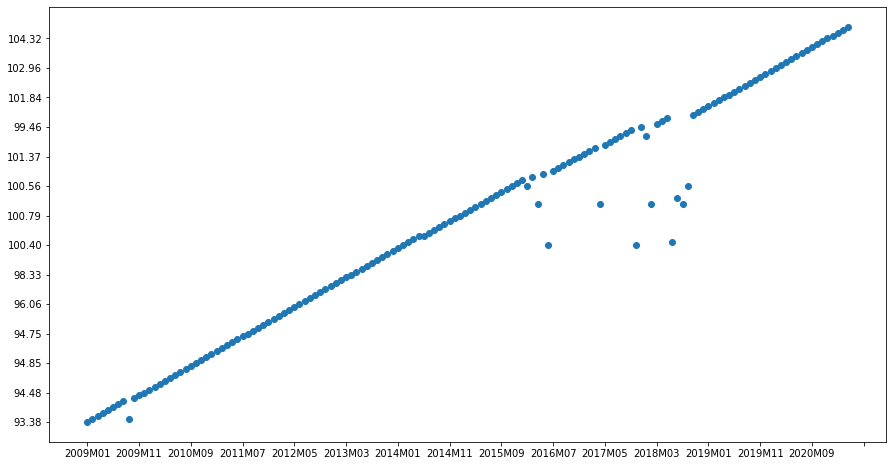

In [124]:
plt.scatter(books1['TIME'], books1['Value']);
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

x = "books1['TIME']"
y = "books1['Value']"
plt.xticks(np.arange(0, len(x)+140, 10))
plt.yticks(np.arange(0, len(y)+120, 10))